In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Johaa\Desktop\ML PROJECTS\DUPLICATE QUESTION PAIRS\train.csv")
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
df.isnull().sum()#Very less null values present

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df["is_duplicate"].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

<Axes: xlabel='is_duplicate', ylabel='count'>

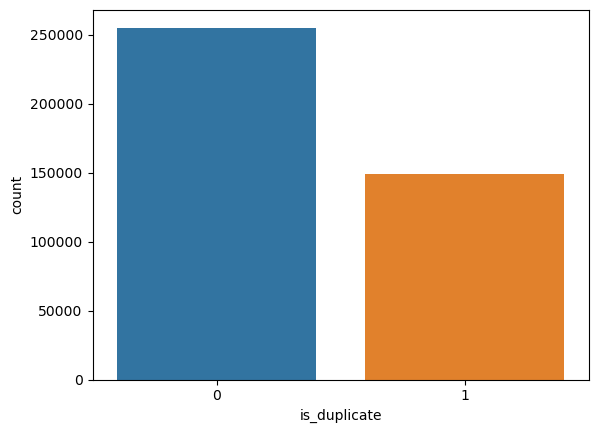

In [7]:
sns.countplot(data=df,x="is_duplicate")#Data is a bit imbalanced

## Applying Bag Of Words

### No other feature engineering applied

In [8]:
new_df=df.sample(30000)

In [9]:
new_df_x=new_df[["question1","question2"]]

In [10]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
73322,73322,125829,82270,What is the most effective method to whiten te...,Do banana peels whiten teeth?,0
191032,191032,105899,69472,How do you build your own computer?,How do I build a computer?,1
401956,401956,105076,535411,How do I lose 10 kg in 15 days?,I have exactly 15 days to get in shape. My aim...,1
182218,182218,155709,96236,What material should I use to pass the 050-730...,What material should I use to pass the 650-157...,0
26721,26721,49692,49693,What are the best morning habits?,What are some good early morning habits?,0
...,...,...,...,...,...,...
221826,221826,107142,33018,Which is the best online grocery shopping webs...,Which is the best online grocery shopping webs...,0
243532,243532,355988,355989,Who make the best Bluetooth speaker?,What's the best bluetooth speaker?,1
346839,346839,475221,475222,How can social engineering be avoided?,How can we prevent social engineering?,1
217366,217366,6968,323696,What is unusual or different about the food an...,What is unusual or different about the food an...,0


In [11]:
corpus=list(new_df["question1"])+list(new_df["question2"])

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=3000)


In [18]:
temp_df=pd.DataFrame(cv.fit_transform(corpus).toarray())

In [20]:
temp_df_1=temp_df[0:30000]
temp_df_1.index=new_df.index
temp_df_2=temp_df[30000:60000]
temp_df_2.index=new_df.index

In [26]:
new_final_df=pd.concat([temp_df_1,temp_df_2],axis=1,ignore_index=True)

In [27]:
new_final_df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
73322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401956,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
new_final_df["is_duplicate"]=new_df["is_duplicate"]

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(new_final_df,new_df["is_duplicate"],test_size=0.2)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
acs=accuracy_score(y_test,y_pred)
acs


0.7365